In this work, you are required to implement an easy linear regression with machine learning methods based on numpy. It is better not to use the deep learning libraries such as PyTorch or Tensorflow .etc.

The first is the data generation. We can generate data that follows a linear distribution with the following functions.

In [96]:
import numpy as np
def get_data(num):
  for _ in range(num):
    x = np.random.uniform(-10.0, 10.0)
    noise = np.random.normal(0, 1)
    y = x * 2 + 1 + noise
    yield np.array([x]).astype(np.float32), np.array([y]).astype(np.float32)

x = np.array([])
y = np.array([])
for x0, y0 in get_data(1000):
  x = np.append(x, x0)
  y = np.append(y, y0)

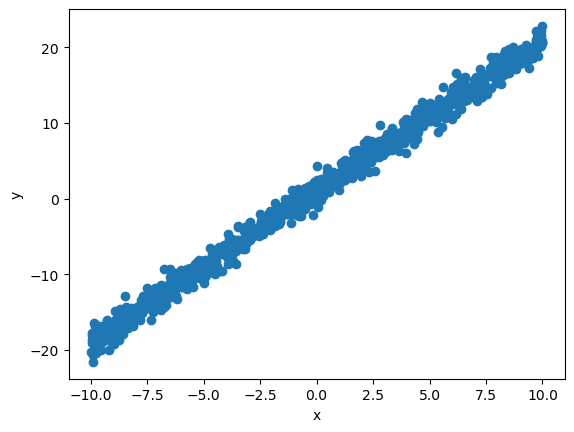

In [97]:
#vision 
from matplotlib import pyplot as plt
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x,y)
plt.savefig('../results/line.png')

The following is setting the hyperparameters, and the initialization of the learnable parameters.

In [98]:
learn_rate = 0.00001
epochs = 100
display_step = 10
batch_size = len(x)/display_step
np.random.seed(0)#其中np.random.seed(0)的作用是使得随机数据可预测，当我们设置相同的seed，每次生成的随机数相同，如果不设置seed，则每次会生成不同的随机数：
w = np.random.rand()
b = np.random.rand()



In [99]:
import torch
import random
# #数据读取
# def data_iter(batch_size, features, labels):
#     num_examples = len(features)
#     indices = list(range(num_examples))
#     # 这些样本是随机读取的，没有特定的顺序
#     random.shuffle(indices)
#     for i in range(0, num_examples, batch_size):
#         batch_indices = torch.tensor(
#             indices[i: min(i + batch_size, num_examples)])
#         xx.append(features[batch_indices])
#         yy.append(labels[batch_indices])
#     return xx,yy
    
        
#定义模型 深度学习中叫做前向传播forward函数
def linreg(x,w,b):
    y = x*w + b
    return y

In [100]:
#定义损失函数
def loss_mse(y_hat,y):
    loss = (y_hat - y)**2/2
    return loss

In [101]:
# #定义优化算法 深度学习中是定义反向传播函数 backward(): 如果是非常复杂的函数需要调包求
# def grad(w, b,lr,x,y):
#     grad_w = 0
#     grad_b = 0
#     w_new = 0
#     b_new = 0
#     for i in range(len(x)):
#         grad_w += (w * x[i]+ b - y[i]) * x[i]
#         grad_b += w * x[i]+ b - y[i]
#     grad_w = grad_w/len(x)/2
#     grad_b = grad_b/len(x)/2
#     w_new  -=  lr * grad_w
#     b_new  -=  lr * grad_b
#     return w_new,b_new
        

So, you only need to write the code to train the learnable parameters w and b. We recommend you use the mean square error function.

epoch 1, loss 33.431854
epoch 2, loss 31.402698
epoch 3, loss 29.491498
epoch 4, loss 27.706942
epoch 5, loss 26.031539
epoch 6, loss 24.464964
epoch 7, loss 22.992511
epoch 8, loss 21.609105
epoch 9, loss 20.299116
epoch 10, loss 19.074510
epoch 11, loss 17.943212
epoch 12, loss 16.866840
epoch 13, loss 15.863046
epoch 14, loss 14.916982
epoch 15, loss 14.030699
epoch 16, loss 13.196373
epoch 17, loss 12.416314
epoch 18, loss 11.686986
epoch 19, loss 11.003618
epoch 20, loss 10.353611
epoch 21, loss 9.752696
epoch 22, loss 9.186094
epoch 23, loss 8.654940
epoch 24, loss 8.151916
epoch 25, loss 7.681323
epoch 26, loss 7.239473
epoch 27, loss 6.825688
epoch 28, loss 6.437416
epoch 29, loss 6.073711
epoch 30, loss 5.731834
epoch 31, loss 5.410791
epoch 32, loss 5.109892
epoch 33, loss 4.828233
epoch 34, loss 4.563237
epoch 35, loss 4.314820
epoch 36, loss 4.082566
epoch 37, loss 3.865283
epoch 38, loss 3.660206
epoch 39, loss 3.468613
epoch 40, loss 3.288115
epoch 41, loss 3.119374
epoch

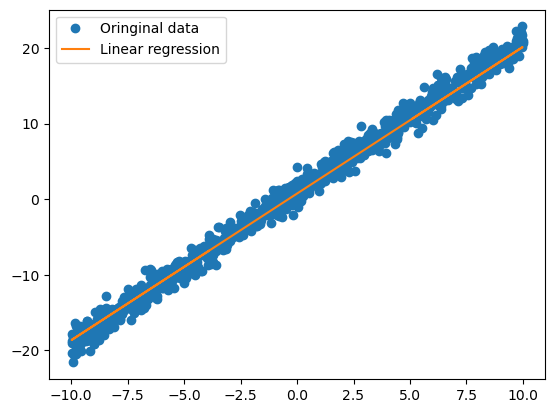

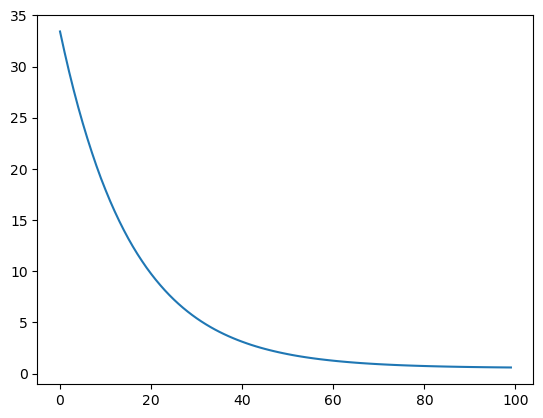

In [102]:
# from sklearn.linear_model import LinearRegression
# import numpy as np
train_l_mean_list = []
for epoch in range(epochs):
    # Your code here
    shuffled_indices = np.random.permutation(len(x))
    x_shuffled = x[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for k in range(0,len(x),display_step):
        xx = x_shuffled[k:int(k+batch_size)]
        yy = y_shuffled[k:int(k+batch_size)]
        grad_w=sum((w*xx+b-yy)*xx)/batch_size
        grad_b=sum((w*xx+b-yy))/batch_size
        w-=learn_rate*grad_w
        b-=learn_rate*grad_b
    train_l = loss_mse(linreg(x, w, b), y)
    train_l_mean = train_l.mean()
    train_l_mean_list.append(train_l_mean)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')    
y1=w*x+b
fig1 = plt.plot(x,y,'o',label='Oringinal data')
plt.plot(x,y1,label='Linear regression')
plt.legend()
plt.show()

fig2 = plt.plot(range(len(train_l_mean_list)),train_l_mean_list)
plt.show()
  # End your code

# loss
$J(w,b) = \frac{1}{2} \sum_ {i=1}^ {batch_size}(wx_i+b-y_i)^2$